In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

# Connexion à la base de données MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']  # Remplacez 'SMEdb' par le nom de votre base de données
collection = db['pmes']  # Remplacez 'pmes' par le nom de votre collection

# Charger les données depuis MongoDB dans un DataFrame pandas
data = pd.DataFrame(list(collection.find()))

# Visualiser les premières lignes
data.head()

,_id,Nom,Password,Email,Tel,SiteWeb,address,Effectif,NomResponsable,ContactResponsable,...,Follows,NombreDeVotes,NoteMoyenne,Abonnement,Boitepostale,MontantInvestissement,TypeInvestissement,DomaineInvestissement,OngVille,Budget
0,66c361d3c177717a96dd2e78,Nisi Dictum LLP,QVJ19CMO4XR,aliquam.ornare.libero@icloud.ca,(766) 456-5058,https://baidu.com,1008 Aenean St.,34,Logan Barr,1-847-746-8532,...,"[66c361ddc177717a96dd3090, 66c361ecc177717a96d...",1899,2.48,"{'Actif': True, 'DateDebut': 2024-09-09 03:18:...",NaN,NaN,NaN,NaN,NaN,NaN
1,66c361d3c177717a96dd2e79,At Iaculis Incorporated,GLQ41PQX7KN,diam.nunc.ullamcorper@icloud.com,(582) 804-1667,http://youtube.com,"6630 Nunc, Avenue",64,Amber Carpenter,863-0189,...,"[66c361ecc177717a96dd324e, 66c361ecc177717a96d...",1899,2.44,"{'Actif': True, 'DateDebut': 2024-09-09 03:18:...",NaN,NaN,NaN,NaN,NaN,NaN
2,66c361d3c177717a96dd2e7a,Nunc Sed Corp.,SJU15OLX6HZ,mollis.nec.cursus@aol.net,1-611-211-3122,https://bbc.co.uk,Ap #850-1545 Commodo Rd.,339,Shaine Henderson,1-241-277-1237,...,"[66c361fcc177717a96dd34c1, 66c361e4c177717a96d...",1899,2.54,"{'Actif': True, 'DateDebut': 2024-09-09 03:18:...",NaN,NaN,NaN,NaN,NaN,NaN
3,66c361d3c177717a96dd2e7b,Convallis Ante Consulting,ZOY47SPX2IB,egestas.nunc.sed@outlook.com,(820) 858-0227,https://cnn.com,1517 Commodo St.,156,Athena Mercado,642-8515,...,"[66c361ddc177717a96dd3096, 66c361ecc177717a96d...",1899,2.48,"{'Actif': True, 'DateDebut': 2024-09-09 03:18:...",NaN,NaN,NaN,NaN,NaN,NaN
4,66c361d3c177717a96dd2e7c,Semper Pretium Consulting,UKY64AVS3TN,sapien.cras.dolor@protonmail.com,1-777-333-1505,http://whatsapp.com,988-9984 Rutrum. St.,492,Orson Camacho,336-7508,...,"[66c361e4c177717a96dd3139, 66c361d3c177717a96d...",1899,2.51,"{'Actif': True, 'DateDebut': 2024-09-09 03:18:...",NaN,NaN,NaN,NaN,NaN,NaN


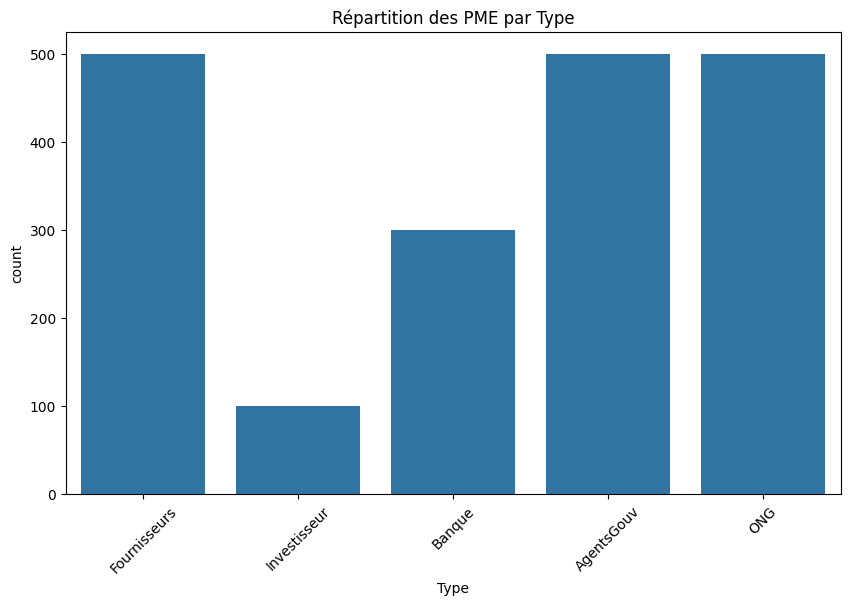

In [2]:
# Exemple de graphique à barres : Nombre de PME par type
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data)
plt.title('Répartition des PME par Type')
plt.xticks(rotation=45)
plt.show()


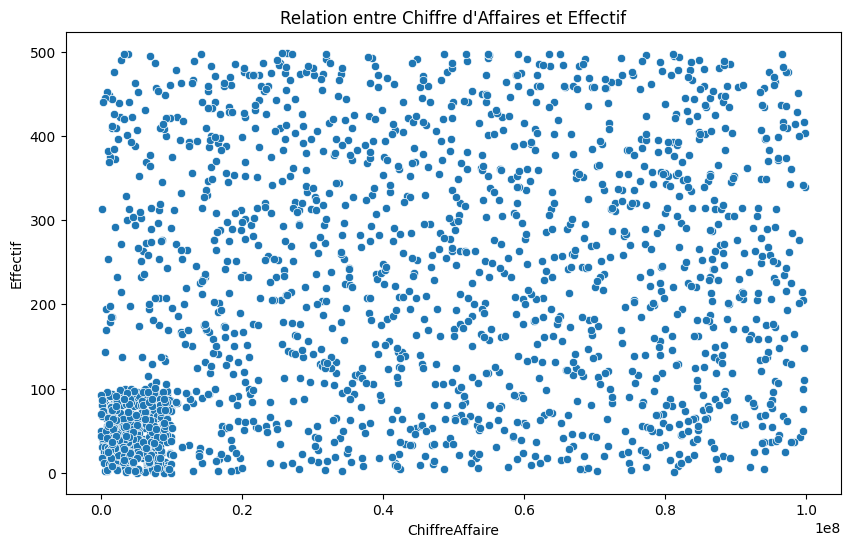

In [3]:
# Exemple de nuage de points : Relation entre Chiffre d'Affaires et Effectif
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ChiffreAffaire', y='Effectif', data=data)
plt.title('Relation entre Chiffre d\'Affaires et Effectif')
plt.show()

In [ ]:
# Exemple de nuage de points : Relation entre Chiffre d'Affaires et Effectif
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ChiffreAffaire', y='Effectif', data=data)
plt.title('Relation entre Chiffre d\'Affaires et Effectif')
plt.show()

In [13]:
import folium
import pandas as pd
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
collection = db['pmes']

# Charger les données depuis MongoDB dans un DataFrame pandas
data = pd.DataFrame(list(collection.find()))

# Filtrer les données pour s'assurer que 'LocalisationGps' est une liste de deux éléments contenant des nombres
def is_valid_gps(gps):
    return isinstance(gps, list) and len(gps) == 2 and all(isinstance(coord, (int, float)) for coord in gps)

data = data[data['LocalisationGps'].apply(is_valid_gps)]

# Initialiser une carte centrée sur une localisation moyenne (par exemple, centre géographique des PME)
map_center = [data['LocalisationGps'].apply(lambda x: x[1]).mean(), data['LocalisationGps'].apply(lambda x: x[0]).mean()]
map_pme = folium.Map(location=map_center, zoom_start=6)

# Ajouter les points des PME sur la carte
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['LocalisationGps'][1], row['LocalisationGps'][0]],
        popup=row['Nom'] if 'Nom' in row else 'PME'
    ).add_to(map_pme)

# Sauvegarder la carte dans un fichier HTML
map_pme.save("map_pmes.html")

# Afficher la carte dans un notebook Jupyter
map_pme


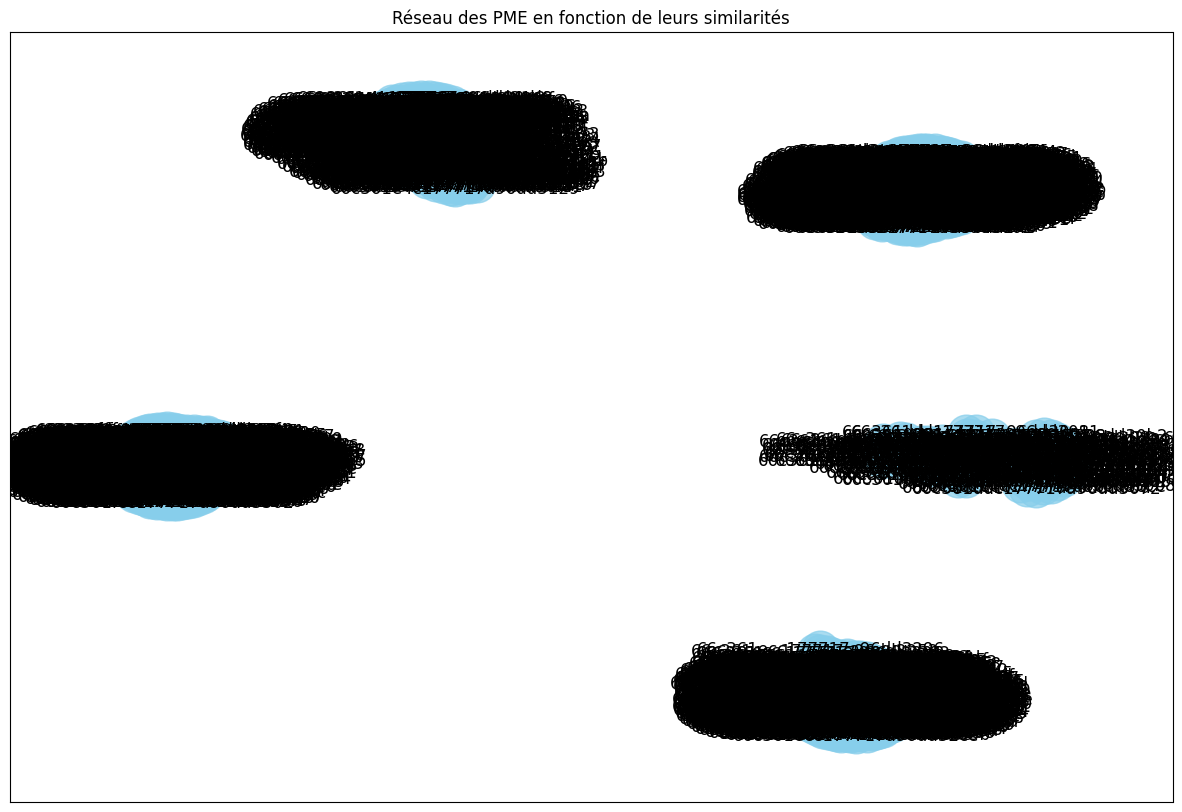

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
collection = db['pmes']

# Charger les données depuis MongoDB
pmes = list(collection.find())

# Définir la fonction calculate_similarity ici ou importez-la depuis un module
def calculate_similarity(pme1, pme2):
    # Votre logique de similarité ici
    similarity = 0
    weight = 0
    # Exemple de logique
    if 'Type' in pme1 and 'Type' in pme2 and pme1['Type'] == pme2['Type']:
        similarity += 1
        weight += 1
    # Ajoutez d'autres critères
    return similarity / weight if weight > 0 else 0

# Création du graphe
G = nx.Graph()

# Ajouter les nœuds (les PME)
for pme in pmes:
    G.add_node(pme['_id'], label=pme['Nom'] if 'Nom' in pme else 'PME')

# Ajouter les arêtes (les relations/similarités)
for pme in pmes:
    for other_pme in pmes:
        if pme['_id'] != other_pme['_id']:
            similarity = calculate_similarity(pme, other_pme)
            if similarity > 0.5:
                G.add_edge(pme['_id'], other_pme['_id'], weight=similarity)

# Dessiner le graphe
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Réseau des PME en fonction de leurs similarités')
plt.show()


In [17]:
import random
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
collection = db['pmes']

# Charger les IDs des PME
pme_ids = [pme['_id'] for pme in collection.find()]

# Générer des likes aléatoires
for pme_id in pme_ids:
    likes = random.sample(pme_ids, k=random.randint(0, len(pme_ids)//2))
    collection.update_one({'_id': pme_id}, {'$set': {'Likes': likes}})

print("Likes générés aléatoirement pour chaque PME.")


Likes générés aléatoirement pour chaque PME.


In [18]:
# Générer des suivis aléatoires
for pme_id in pme_ids:
    follows = random.sample(pme_ids, k=random.randint(0, len(pme_ids)//2))
    collection.update_one({'_id': pme_id}, {'$set': {'Follows': follows}})

print("Suivis générés aléatoirement pour chaque PME.")


Suivis générés aléatoirement pour chaque PME.


In [32]:
from bson import ObjectId
import folium
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
collection = db['pmes']

# Charger les données depuis MongoDB dans une liste de dictionnaires
pmes = list(collection.find())

# Fonction pour obtenir les concurrents et collaborateurs potentiels
def get_nearby_pmes(pme_id, pmes, n=10):
    try:
        pme_object_id = ObjectId('66c361d3c177717a96dd2e93')  # Assurez-vous que l'ID est un ObjectId
    except Exception as e:
        raise ValueError(f"L'ID fourni ({pme_id}) n'est pas un ObjectId valide.") from e

    current_pme = next((pme for pme in pmes if pme['_id'] == pme_object_id), None)
    
    if not current_pme:
        raise ValueError("PME non trouvée")

    competitors = []
    collaborators = []
    
    for other_pme in pmes:
        if other_pme['_id'] == pme_object_id:
            continue
        similarity = calculate_similarity(current_pme, other_pme)
        if similarity > 0.7:  # Concurrents
            competitors.append((other_pme, similarity))
        elif similarity < 0.5:  # Collaborateurs potentiels
            collaborators.append((other_pme, similarity))
    
    competitors.sort(key=lambda x: x[1], reverse=True)
    collaborators.sort(key=lambda x: x[1], reverse=True)

    return competitors[:n], collaborators[:n]

# Remplacez "66c361d3c177717a96dd2e93" par l'ObjectId de votre PME dans MongoDB
competitors, collaborators = get_nearby_pmes("66c361d3c177717a96dd2e93", pmes)

# Initialiser la carte centrée sur la PME courante
current_pme = next(pme for pme in pmes if pme['_id'] == ObjectId("66c361d3c177717a96dd2e93"))
map_pme = folium.Map(location=[current_pme['LocalisationGps'][1], current_pme['LocalisationGps'][0]], zoom_start=10)

# Ajouter la PME courante en bleu
folium.Marker(
    location=[current_pme['LocalisationGps'][1], current_pme['LocalisationGps'][0]],
    popup="PME Courante",
    icon=folium.Icon(color='blue')
).add_to(map_pme)

# Ajouter les concurrents en rouge
for competitor, _ in competitors:
    folium.Marker(
        location=[competitor['LocalisationGps'][1], competitor['LocalisationGps'][0]],
        popup="Concurrent",
        icon=folium.Icon(color='red')
    ).add_to(map_pme)

# Ajouter les collaborateurs potentiels en vert
for collaborator, _ in collaborators:
    folium.Marker(
        location=[collaborator['LocalisationGps'][1], collaborator['LocalisationGps'][0]],
        popup="Collaborateur potentiel",
        icon=folium.Icon(color='green')
    ).add_to(map_pme)

# Sauvegarder la carte dans un fichier HTML
map_pme.save("map_recommandation_pmes.html")

# Afficher la carte dans un notebook Jupyter
map_pme


In [28]:
import random
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
pme_collection = db['pmes']  # Remplacez par le nom réel de votre collection

# Générer des notations aléatoires entre PME
def generate_random_ratings():
    pmes = list(pme_collection.find())
    
    for pme in pmes:
        total_votes = 0
        total_score = 0
        
        for other_pme in pmes:
            if pme['_id'] != other_pme['_id']:
                note = random.randint(0, 5)  # Note aléatoire entre 0 et 5
                total_votes += 1
                total_score += note
        
        # Mise à jour des champs NoteMoyenne et NombreDeVotes
        pme['NombreDeVotes'] = total_votes
        pme['NoteMoyenne'] = round(total_score / total_votes, 2) if total_votes > 0 else 0
        
        # Mise à jour dans la base de données
        pme_collection.update_one({'_id': pme['_id']}, {'$set': {'NombreDeVotes': pme['NombreDeVotes'], 'NoteMoyenne': pme['NoteMoyenne']}})
        print(f"NoteMoyenne mise à jour pour {pme['Nom']}: {pme['NoteMoyenne']}")

# Exécution de la fonction
generate_random_ratings()


NoteMoyenne mise à jour pour Nisi Dictum LLP: 2.48
NoteMoyenne mise à jour pour At Iaculis Incorporated: 2.44
NoteMoyenne mise à jour pour Nunc Sed Corp.: 2.54
NoteMoyenne mise à jour pour Convallis Ante Consulting: 2.48
NoteMoyenne mise à jour pour Semper Pretium Consulting: 2.51
NoteMoyenne mise à jour pour Mollis Dui In Industries: 2.42
NoteMoyenne mise à jour pour Proin Ultrices Ltd: 2.46
NoteMoyenne mise à jour pour Arcu Aliquam PC: 2.5
NoteMoyenne mise à jour pour Faucibus Leo In Limited: 2.5
NoteMoyenne mise à jour pour Molestie Inc.: 2.51
NoteMoyenne mise à jour pour Lorem Ac Associates: 2.46
NoteMoyenne mise à jour pour At Auctor Inc.: 2.52
NoteMoyenne mise à jour pour In Aliquet Corp.: 2.52
NoteMoyenne mise à jour pour Nascetur Ridiculus LLP: 2.48
NoteMoyenne mise à jour pour Proin Dolor Foundation: 2.52
NoteMoyenne mise à jour pour Tellus Imperdiet Industries: 2.52
NoteMoyenne mise à jour pour Luctus Et Incorporated: 2.51
NoteMoyenne mise à jour pour Eu Arcu Limited: 2.58
No

In [31]:
import random
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
pme_collection = db['pmes']  # Remplacez par le nom réel de votre collection

# Limites géographiques approximatives du Cameroun
LAT_MIN = 2.0    # Latitude minimale (Sud du Cameroun)
LAT_MAX = 13.0   # Latitude maximale (Nord du Cameroun)
LON_MIN = 8.0    # Longitude minimale (Ouest du Cameroun)
LON_MAX = 16.0   # Longitude maximale (Est du Cameroun)

# Générer des localisations GPS aléatoires au Cameroun
def generate_random_gps_locations():
    pmes = list(pme_collection.find())
    
    for pme in pmes:
        random_lat = round(random.uniform(LAT_MIN, LAT_MAX), 6)
        random_lon = round(random.uniform(LON_MIN, LON_MAX), 6)
        
        # Mise à jour du champ LocalisationGps
        pme['LocalisationGps'] = [random_lat, random_lon]
        
        # Mise à jour dans la base de données
        pme_collection.update_one({'_id': pme['_id']}, {'$set': {'LocalisationGps': pme['LocalisationGps']}})
        print(f"Localisation mise à jour pour {pme['Nom']}: {pme['LocalisationGps']}")

# Exécution de la fonction
generate_random_gps_locations()


Localisation mise à jour pour Nisi Dictum LLP: [12.003046, 9.149129]
Localisation mise à jour pour At Iaculis Incorporated: [10.36174, 9.251261]
Localisation mise à jour pour Nunc Sed Corp.: [2.65996, 13.318911]
Localisation mise à jour pour Convallis Ante Consulting: [8.911447, 12.461818]
Localisation mise à jour pour Semper Pretium Consulting: [7.671894, 9.545861]
Localisation mise à jour pour Mollis Dui In Industries: [9.531588, 8.321027]
Localisation mise à jour pour Proin Ultrices Ltd: [2.804161, 11.462059]
Localisation mise à jour pour Arcu Aliquam PC: [8.966588, 13.324705]
Localisation mise à jour pour Faucibus Leo In Limited: [5.839422, 11.196602]
Localisation mise à jour pour Molestie Inc.: [2.347376, 11.60427]
Localisation mise à jour pour Lorem Ac Associates: [5.197614, 13.527303]
Localisation mise à jour pour At Auctor Inc.: [7.551031, 9.842625]
Localisation mise à jour pour In Aliquet Corp.: [8.378392, 13.060707]
Localisation mise à jour pour Nascetur Ridiculus LLP: [11.19

In [ ]:
import pandas as pd

# Convertir les recommandations en DataFrame
reco_data = {
    'PME': [pme['Nom'] for pme in recommandations],
    'Type': [pme['Type'] for pme in recommandations],
    'Similitude': [pme['similarity'] for pme in recommandations],
    'NoteMoyenne': [pme['NoteMoyenne'] for pme in recommandations]
}

df_recommendations = pd.DataFrame(reco_data)
display(df_recommendations)


In [ ]:
import folium

# Initialiser la carte centrée sur la localisation moyenne des PME
map_center = [4.044, 9.709]  # Par exemple, Cameroun
map_pme = folium.Map(location=map_center, zoom_start=7)

# Ajouter des marqueurs pour les PME recommandées
for pme in recommandations:
    folium.Marker(
        location=pme['LocalisationGps'], 
        popup=f"{pme['Nom']} - Similitude: {pme['similarity']:.2f}",
        icon=folium.Icon(color='blue' if pme['Type'] == 'Collaborateur' else 'red')
    ).add_to(map_pme)

map_pme


In [ ]:
# Affichage des collaborateurs
collaborators = df_recommendations[df_recommendations['Type'] == 'Collaborateur']
display(collaborators)

# Affichage des concurrents
competitors = df_recommendations[df_recommendations['Type'] == 'Concurrent']
display(competitors)


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Exemple des descriptions d'objectifs, activités et métiers
objectifs = [
    "Renforcement des droits humains",
    "Consolidation de l'accès à la justice",
    "Intensification de la lutte contre l'insécurité"
]

metiers = [
    "Avocat",
    "Policier",
    "Magistrat"
]

activites = [
    "Protection des droits",
    "Gestion de la justice",
    "Lutte contre la criminalité"
]

# Combine all descriptions
all_descriptions = objectifs + metiers + activites

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_descriptions)

# Calculer la similarité entre les objectifs et les activités/métiers
similarities = cosine_similarity(tfidf_matrix[:len(objectifs)], tfidf_matrix[len(objectifs):])

# Affichage des similarités
df_similarity = pd.DataFrame(similarities, columns=metiers + activites)
print(df_similarity)


   Avocat  Policier  Magistrat  Protection des droits  Gestion de la justice  \
0     0.0       0.0        0.0                0.49476               0.000000   
1     0.0       0.0        0.0                0.00000               0.534033   
2     0.0       0.0        0.0                0.00000               0.280395   

   Lutte contre la criminalité  
0                     0.000000  
1                     0.130164  
2                     0.522766  


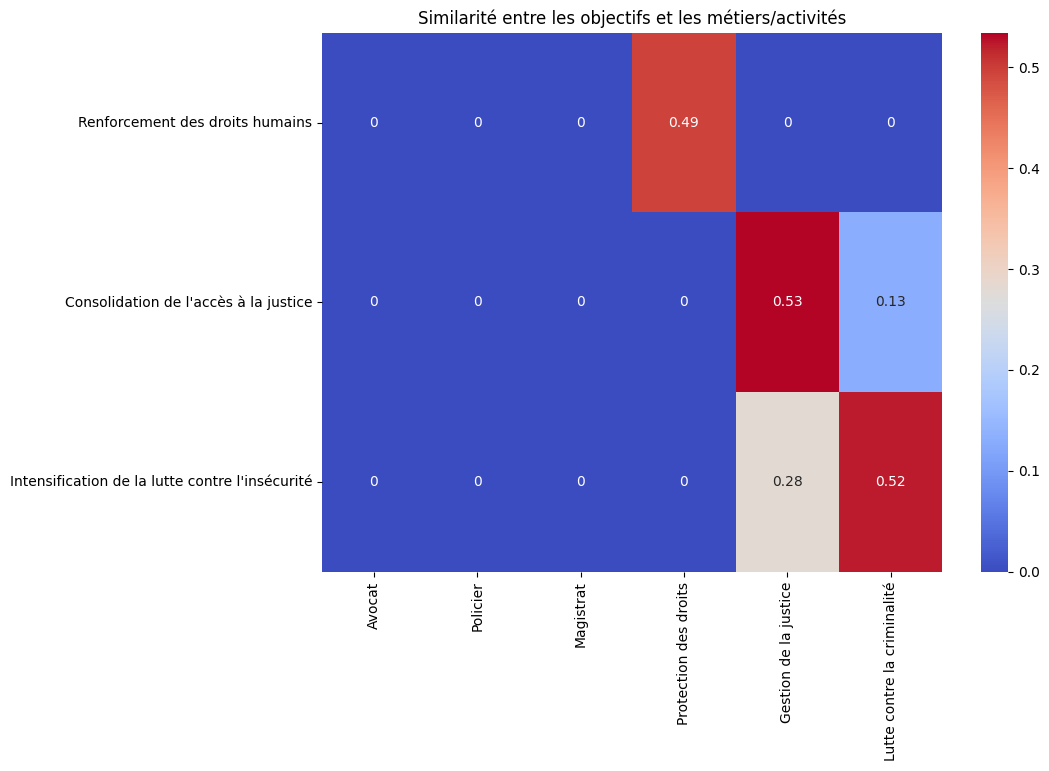

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap des similarités
plt.figure(figsize=(10, 7))
sns.heatmap(df_similarity, annot=True, cmap='coolwarm', xticklabels=metiers + activites, yticklabels=objectifs)
plt.title("Similarité entre les objectifs et les métiers/activités")
plt.show()


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']

# Accès à la collection metiers
metiers_collection = db['metiers']
metiers_descriptions = metiers_collection.find({}, {'description': 1})

# Accès à la collection activites
activites_collection = db['activites']
activites_data = activites_collection.find({}, {'DESCRIPTION': 1, 'ACTIVITE': 1})

# Accès à la collection piliers
piliers_collection = db['piliers']
piliers_data = piliers_collection.find({})

# Exemple de données pour les activités et les métiers
documents_activites = [activite['ACTIVITE'] for activite in activites_data]
documents_metiers = [metier['description'] for metier in metiers]
documents_piliers = [pilier['nom'] for pilier in piliers] + [obj for pilier in piliers for sous_pilier in pilier['sous_piliers'].values() for obj in sous_pilier['objectifs'].values()]

# Fusionner les documents
documents = documents_activites + documents_metiers + documents_piliers

# Calcul TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Calcul de la similarité
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)


KeyError: 'ACTIVITE'

In [5]:
from pymongo import MongoClient
from bson import ObjectId

class DataAccess:
    def __init__(self, db_uri="mongodb://localhost:27017/", db_name="SMEdb"):
        self.client = MongoClient(db_uri)
        self.db = self.client[db_name]

    def get_pme_data(self, pme_id):
        pme = self.db.pmes.find_one({"_id": ObjectId(pme_id)})
        if not pme:
            return None
        
        activites = self.db.activites.find({"NAF": pme.get("NAF")})
        metiers = self.db.metiers.find({"_id": {"$in": pme.get("metiers", [])}})
        piliers = self.db.piliers.find()

        return {
            "pme": pme,
            "activites": list(activites),
            "metiers": list(metiers),
            "piliers": list(piliers)
        }

    def get_all_pmes_except(self, pme_id):
        return list(self.db.pmes.find({"_id": {"$ne": ObjectId(pme_id)}}))

    def close(self):
        self.client.close()

# Utilisation
data_access = DataAccess()
pme_data = data_access.get_pme_data("66c361d3c177717a96dd2eaa")
other_pmes = data_access.get_all_pmes_except("66c361d3c177717a96dd2eaa")
data_access.close()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

class TextMiningAlgorithms:
    def __init__(self, pme_data, other_pmes):
        self.pme_data = pme_data
        self.other_pmes = other_pmes
        self.prepare_data()

    def prepare_data(self):
        self.pme_text = self.get_pme_text(self.pme_data)
        self.other_pmes_texts = [self.get_pme_text(pme) for pme in self.other_pmes]

    def get_pme_text(self, pme):
        #text = f"{pme['nom']} {pme['description']} " f"{pme['nom']} {pme['description']} "
        text = f""
        text += " ".join([a['ACTIVITE'] + " " + a['DESCRIPTION'] for a in pme.get('activites', [])])
        text += " ".join([m['description'] for m in pme.get('metiers', [])])
        return text

    def tfidf_cosine_similarity(self):
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([self.pme_text] + self.other_pmes_texts)
        cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
        return cosine_similarities

    def word2vec_similarity(self):
        tokenized_texts = [word_tokenize(text.lower()) for text in [self.pme_text] + self.other_pmes_texts]
        model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
        
        def text_to_vec(text):
            words = word_tokenize(text.lower())
            return np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
        
        pme_vec = text_to_vec(self.pme_text)
        other_pmes_vecs = [text_to_vec(text) for text in self.other_pmes_texts]
        
        similarities = [cosine_similarity([pme_vec], [vec])[0][0] for vec in other_pmes_vecs]
        return np.array(similarities)

    def jaccard_similarity(self):
        def jaccard(set1, set2):
            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            return intersection / union if union != 0 else 0

        pme_set = set(word_tokenize(self.pme_text.lower()))
        other_pmes_sets = [set(word_tokenize(text.lower())) for text in self.other_pmes_texts]
        
        similarities = [jaccard(pme_set, other_set) for other_set in other_pmes_sets]
        return np.array(similarities)

# Utilisation
algorithms = TextMiningAlgorithms(pme_data, other_pmes)
tfidf_similarities = algorithms.tfidf_cosine_similarity()
word2vec_similarities = algorithms.word2vec_similarity()
jaccard_similarities = algorithms.jaccard_similarity()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_recommendations(similarities_dict, top_n=5):
    fig, axes = plt.subplots(len(similarities_dict), 1, figsize=(12, 6*len(similarities_dict)))
    fig.suptitle("Top 5 Recommended PMEs for Each Algorithm", fontsize=16)

    for i, (algo_name, similarities) in enumerate(similarities_dict.items()):
        top_indices = similarities.argsort()[-top_n:][::-1]
        top_similarities = similarities[top_indices]
        top_names = [other_pmes[i]['nom'] for i in top_indices]

        ax = axes[i] if len(similarities_dict) > 1 else axes
        sns.barplot(x=top_similarities, y=top_names, ax=ax)
        ax.set_title(f"{algo_name} - Top {top_n} Recommendations")
        ax.set_xlabel("Similarity Score")
        ax.set_ylabel("PME Name")

    plt.tight_layout()
    plt.show()

# Utilisation
similarities_dict = {
    "TF-IDF Cosine": tfidf_similarities,
    "Word2Vec": word2vec_similarities,
    "Jaccard": jaccard_similarities
}

visualize_recommendations(similarities_dict)

In [ ]:
import time
import psutil
import os

def measure_complexity(func, *args, **kwargs):
    start_time = time.time()
    start_memory = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024  # En MB

    result = func(*args, **kwargs)

    end_time = time.time()
    end_memory = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024  # En MB

    time_complexity = end_time - start_time
    space_complexity = end_memory - start_memory

    return {
        "time_complexity": time_complexity,
        "space_complexity": space_complexity,
        "result": result
    }

# Utilisation
algorithms = TextMiningAlgorithms(pme_data, other_pmes)

tfidf_complexity = measure_complexity(algorithms.tfidf_cosine_similarity)
word2vec_complexity = measure_complexity(algorithms.word2vec_similarity)
jaccard_complexity = measure_complexity(algorithms.jaccard_similarity)

print("TF-IDF Complexity:", tfidf_complexity)
print("Word2Vec Complexity:", word2vec_complexity)
print("Jaccard Complexity:", jaccard_complexity)

In [ ]:
from gensim.models import Word2Vec

# Tokeniser les descriptions en listes de mots
tokenized_documents = [doc.split() for doc in documents]

# Modèle Word2Vec
model = Word2Vec(sentences=tokenized_documents, vector_size=100, window=5, min_count=1, workers=4)

# Calcul de similarité entre deux mots ou phrases
similarity = model.wv.similarity('ACTIVITE', 'metier')


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation avec TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Appliquer SVD pour LSA
svd = TruncatedSVD(n_components=100)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# Calcul de similarité
similarity_matrix = cosine_similarity(lsa_matrix)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation des documents
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(documents)

# Modèle LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_matrix = lda.fit_transform(document_term_matrix)

# Visualisation des topics
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.sklearn.prepare(lda, document_term_matrix, vectorizer)
pyLDAvis.display(lda_vis)


In [15]:
import random
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
pme_collection = db['pmes']
activite_collection = db['activites']

# Fonction pour attribuer aléatoirement un code NAF et une description à partir de l'_id de l'activité
def assign_naf_and_description():
    pmes = pme_collection.find()
    
    for pme in pmes:
        # Récupère l'_id de l'activité pour la PME actuelle
        activite_ids = pme.get('Activites', [])
        
        if activite_ids:
            # Récupère les détails de l'activité depuis la collection 'activites'
            activite = activite_collection.find_one({'_id': random.choice(activite_ids)})
            
            if activite:
                naf_code = activite.get('NAF', None)
                activite_description = activite.get('DESCRIPTION', None)
                
                # Mise à jour de la PME avec le code NAF et la description de l'activité
                pme_collection.update_one(
                    {'_id': pme['_id']},
                    {
                        '$set': {
                            'NAF': naf_code,
                            'ActiviteDescription': activite_description
                        }
                    }
                )
                print(f"PME {pme['Nom']} mise à jour avec le NAF {naf_code} et la description de l'activité {activite_description}.")
            else:
                print(f"Aucune activité trouvée pour l'_id dans PME {pme['Nom']}.")
        else:
            print(f"Pas d'activités associées pour la PME {pme['Nom']}.")

# Exécution du script
if __name__ == "__main__":
    assign_naf_and_description()


Aucune activité trouvée pour l'_id dans PME Nisi Dictum LLP.
Aucune activité trouvée pour l'_id dans PME At Iaculis Incorporated.
Aucune activité trouvée pour l'_id dans PME Nunc Sed Corp..
Aucune activité trouvée pour l'_id dans PME Convallis Ante Consulting.
Aucune activité trouvée pour l'_id dans PME Semper Pretium Consulting.
Aucune activité trouvée pour l'_id dans PME Mollis Dui In Industries.
Aucune activité trouvée pour l'_id dans PME Proin Ultrices Ltd.
Aucune activité trouvée pour l'_id dans PME Arcu Aliquam PC.
Aucune activité trouvée pour l'_id dans PME Faucibus Leo In Limited.
Aucune activité trouvée pour l'_id dans PME Molestie Inc..
Aucune activité trouvée pour l'_id dans PME Lorem Ac Associates.
Aucune activité trouvée pour l'_id dans PME At Auctor Inc..
Aucune activité trouvée pour l'_id dans PME In Aliquet Corp..
Aucune activité trouvée pour l'_id dans PME Nascetur Ridiculus LLP.
Aucune activité trouvée pour l'_id dans PME Proin Dolor Foundation.
Aucune activité trouvé

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Texte à analyser
def calculate_similarity_between_activities_and_metiers(pme_activite_description, metiers_descriptions):
    documents = [pme_activite_description] + metiers_descriptions
    
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Calcul de la similarité cosinus entre la PME et les métiers
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    
    return cosine_similarities

# Exemple d'utilisation
pme_description = "Production agroalimentaire"
metiers_descriptions = ["Consultant en agroalimentaire", "Spécialiste en packaging", "Expert logistique"]
similarities = calculate_similarity_between_activities_and_metiers(pme_description, metiers_descriptions)

# Afficher les résultats de similarité
for i, similarity in enumerate(similarities[0]):
    print(f"Similarité avec métier {i+1} : {similarity}")


Similarité avec métier 1 : 0.32591355218485263
Similarité avec métier 2 : 0.0
Similarité avec métier 3 : 0.0


In [18]:
from pymongo import MongoClient
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from transformers import BertTokenizer, BertModel
import torch

# Connexion MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['SMEdb']
pme_collection = db['pmes']
metiers_collection = db['metiers']

# Récupère la description d'une PME et des métiers
def get_pme_and_metiers(pme_id):
    pme = pme_collection.find_one({'_id': pme_id})
    
    if pme:
        pme_description = pme.get('ActiviteDescription', '')
        # Récupérer toutes les descriptions des métiers
        metiers = metiers_collection.find()
        metiers_descriptions = [metier['description'] for metier in metiers]
        return pme_description, metiers_descriptions
    else:
        print(f"PME avec l'_id {pme_id} non trouvée.")
        return None, None


In [19]:
# TF-IDF Similarity
def tfidf_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    documents = [pme_description] + metiers_descriptions
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Calculer la similarité cosinus
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    return cosine_similarities


In [20]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Word2Vec Similarity
def word2vec_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    # Tokeniser les descriptions
    documents = [word_tokenize(text.lower()) for text in [pme_description] + metiers_descriptions]

    # Créer et entraîner le modèle Word2Vec
    model = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

    # Calculer la similarité entre la description de la PME et chaque métier
    pme_vector = model.wv[pme_description.lower().split()]
    similarities = []
    
    for metier in metiers_descriptions:
        metier_vector = model.wv[metier.lower().split()]
        similarity = cosine_similarity([pme_vector.mean(axis=0)], [metier_vector.mean(axis=0)])
        similarities.append(similarity[0][0])
    
    return similarities


In [21]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Word2Vec Similarity
def word2vec_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    # Tokeniser les descriptions
    documents = [word_tokenize(text.lower()) for text in [pme_description] + metiers_descriptions]

    # Créer et entraîner le modèle Word2Vec
    model = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

    # Calculer la similarité entre la description de la PME et chaque métier
    pme_vector = model.wv[pme_description.lower().split()]
    similarities = []
    
    for metier in metiers_descriptions:
        metier_vector = model.wv[metier.lower().split()]
        similarity = cosine_similarity([pme_vector.mean(axis=0)], [metier_vector.mean(axis=0)])
        similarities.append(similarity[0][0])
    
    return similarities


In [22]:
from sklearn.decomposition import TruncatedSVD

# LSA Similarity
def lsa_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    documents = [pme_description] + metiers_descriptions
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # LSA - Truncated SVD
    lsa = TruncatedSVD(n_components=2)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)
    
    # Similarité cosinus entre la PME et les métiers
    cosine_similarities = cosine_similarity(lsa_matrix[0:1], lsa_matrix[1:])
    return cosine_similarities


In [23]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA Similarity
def lda_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    documents = [pme_description] + metiers_descriptions
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # LDA
    lda = LatentDirichletAllocation(n_components=2, random_state=0)
    lda_matrix = lda.fit_transform(tfidf_matrix)
    
    # Similarité cosinus entre la PME et les métiers
    cosine_similarities = cosine_similarity(lda_matrix[0:1], lda_matrix[1:])
    return cosine_similarities


In [24]:
from transformers import BertTokenizer, BertModel
import torch

# BERT Similarity
def bert_similarity(pme_id):
    pme_description, metiers_descriptions = get_pme_and_metiers(pme_id)
    if not pme_description:
        return

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Tokeniser les textes
    inputs = tokenizer([pme_description] + metiers_descriptions, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)

    # Obtenir les embeddings pour le texte de la PME et des métiers
    pme_embedding = outputs.last_hidden_state[0].mean(dim=0)
    metiers_embeddings = outputs.last_hidden_state[1:].mean(dim=1)

    # Calculer les similarités cosinus
    cosine_similarities = cosine_similarity([pme_embedding.detach().numpy()], metiers_embeddings.detach().numpy())
    return cosine_similarities


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour visualiser les résultats
def visualize_similarities(similarities, algorithm_name, metiers_descriptions):
    x = np.arange(len(similarities))
    plt.bar(x, similarities)
    plt.xticks(x, [f'Metier {i+1}' for i in range(len(metiers_descriptions))], rotation=45)
    plt.title(f'Similarité PME-Métiers avec {algorithm_name}')
    plt.xlabel('Métiers')
    plt.ylabel('Similarité')
    plt.show()

# Exemple d'utilisation avec TF-IDF
similarities_tfidf = tfidf_similarity(pme_id="ID_PME_EXEMPLE")
if similarities_tfidf is not None:
    visualize_similarities(similarities_tfidf[0], 'TF-IDF', metiers_descriptions)

# Idem pour les autres algorithmes


PME avec l'_id ID_PME_EXEMPLE non trouvée.
